# PCA

In [2]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.6 MB/s eta 0:00:00


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# 평균 0, 분산 1을 갖도록 X_features scaling : 여러 scaler 중 하나
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import mglearn

In [5]:
cancer = load_breast_cancer()

cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
cancer['data'].shape

(569, 30)

차원 축소를 하기에 앞서 X feature들 간의 단위 차이를 조정해줘야한다. -> scaling

Q. 차원축소를 하기 전, 왜 scaling을 진행해야 할까?  
A. PCA는 feature 간의 공분산 행렬을 계산하는데, 이의 각 요소는 데이터의 분산 정도를 의미한다. 분산 정도가 크면 데이터간 간격이 넓다는 것을 의미한다. 이는 데이터를 같은 공간 안에서도 더 잘 표현해줄 수 있다는 것을 의미한다.  
분산이 작으면, 데이터가 뭉쳐있다는 것을 의미하므로 해당 데이터를 잘 표현해주지 못한다.데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있기 때문

In [17]:
scaler = StandardScaler()   #평균=0 분산=1 로 스케일 조정
scaler.fit(cancer.data)
data = scaler.transform(cancer.data)

In [18]:
data[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [19]:
# 정규화한 데이터를 원래 데이터로 되돌리려면 inverse_transform 사용
# scaler.inverse_transform(data)

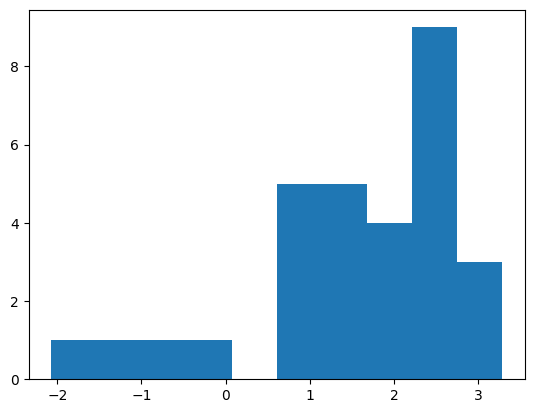

In [20]:
plt.hist(data[0])
plt.show()

In [7]:
len(cancer.feature_names)

30

#### pca parameter
n_components : 주성분 개수 설정  
-> 주성분 개수를  n으로 정하면, 상위 n개의 주성분만 유지

Q. n_components의 최대값은 어떻게 될까?

data = 569, feature = 30  
-> 최대 30  

data = 20, feature = 48  
-> 최대 20

In [21]:
pca = PCA(n_components=2) #주성분 개수 = 2개

# pca model 학습 : X_data만 필요
pca.fit(data)

# 학습된 pca model을 이용해 data 변환 : 차원 축소
data_pca = pca.transform(data)
print("원본 데이터 형태:", str(data.shape))
print("축소된 데이터 형태:", str(data_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


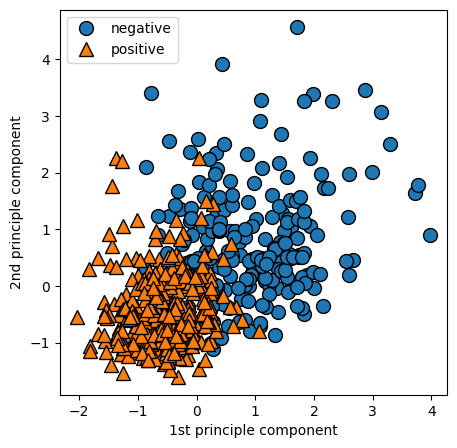

In [22]:
#차원 축소 결과 시각화
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(data[:, 0], data[:, 5], cancer.target)

plt.xlabel("1st principle component")
plt.ylabel("2nd principle component")

plt.legend(["negative", "positive"], loc="best") #범례 추가 (loc = 위치 0, 1, 2, 3, best)

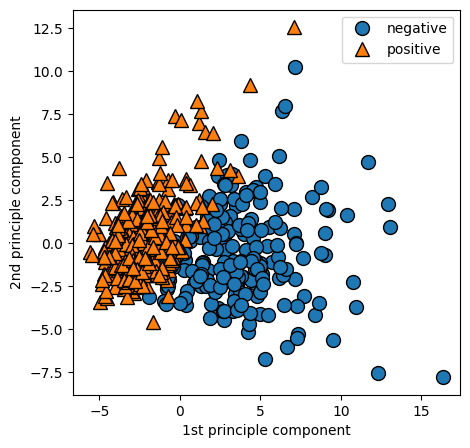

In [23]:
#차원 축소 결과 시각화
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(data_pca[:, 0], data_pca[:, 1], cancer.target)

plt.xlabel("1st principle component")
plt.ylabel("2nd principle component")

plt.legend(["negative", "positive"], loc="best") #범례 추가 (loc = 위치 0, 1, 2, 3, best)

principle components는 원본 feature들의 조합으로 표현할 수 있다.
그럼 어떤 조합으로 이루어져 있을까?

In [24]:
print(pca.components_[0], pca.components_[1], sep='\n\n')

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


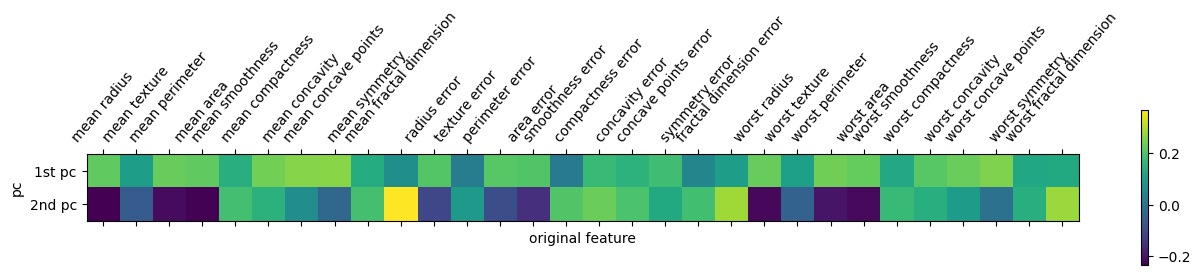

In [25]:
plt.matshow(pca.components_, cmap='viridis') #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=50)
plt.yticks([0, 1], ["1st pc", "2nd pc"])

plt.xlabel("original feature")
plt.ylabel("pc")

plt.colorbar()

plt.show()